## 1. Idea

## 2. Initial exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Reading the DataFrame from the .csv file

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


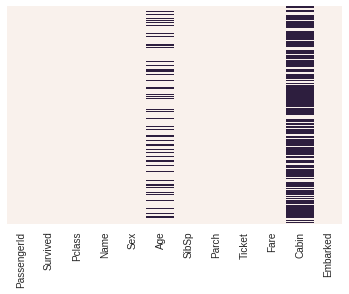

In [3]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [4]:
sns.set_style('whitegrid')

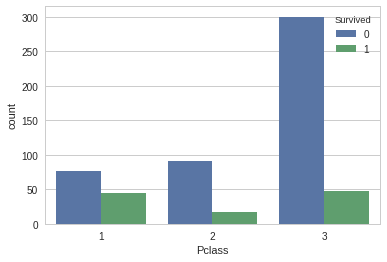

In [5]:
sns.countplot(x='Pclass',hue='Survived',data=df[df['Sex']=='male'])

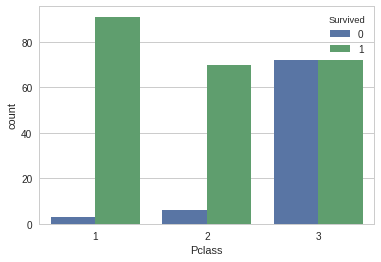

In [6]:
sns.countplot(x='Pclass',hue='Survived',data=df[df['Sex']=='female'])

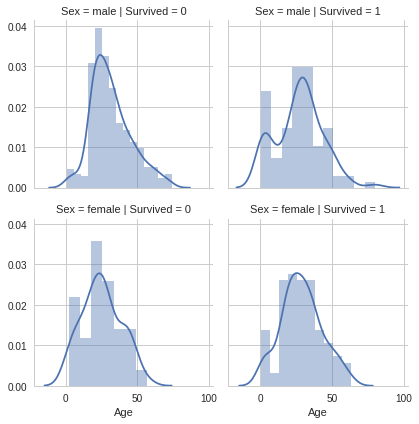

In [7]:
g = sns.FacetGrid(data=df,col='Survived',row='Sex')
g.map(sns.distplot,'Age')

## 3. Introducing new features, gender/class subframes and function Difference

### 3.1. New features

In [56]:
df['CabType']=df['Cabin'].apply(lambda s: str(s)[0])
df['CabType'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [49]:
def CorrectTitle(s):
    if ((s=='Mr.') or (s=='Miss.') or (s=='Mrs.') or (s=='Master.') or (s=='Dr.') or (s=='Rev.')): return s
    return 'U.'

df['Title']=df['Title'].apply(lambda s: CorrectTitle(s))
df['Title'].value_counts()

Mr.        502
Miss.      179
Mrs.       121
Master.     40
U.          36
Dr.          7
Rev.         6
Name: Title, dtype: int64

### 3.2. Subframes

In [50]:
df_F = df[(df['Sex']=='female')]
df_F_cl1 = df[(df['Sex']=='female') & (df['Pclass']==1)]
df_F_cl2 = df[(df['Sex']=='female') & (df['Pclass']==2)]
df_F_cl3 = df[(df['Sex']=='female') & (df['Pclass']==3)]
df_M = df[(df['Sex']=='male')]
df_M_cl1 = df[(df['Sex']=='male') & (df['Pclass']==1)]
df_M_cl2 = df[(df['Sex']=='male') & (df['Pclass']==2)]
df_M_cl3 = df[(df['Sex']=='male') & (df['Pclass']==3)]

### 3.3. Function "Difference"

In [51]:
def Difference(df):
    Nsurv = df[df['Survived']==1]['Survived'].count()
    Ndied = df[df['Survived']==0]['Survived'].count()
    Ndiff = Nsurv-Ndied
    survRate = Nsurv/(Nsurv+Ndied)
    dNsurv=Nsurv**0.5
    dNdied=Ndied**0.5
    dNdiff=(Nsurv+Ndied)**0.5
    dRateNum = (((Nsurv+Ndied)**2)*Nsurv + (Nsurv**2)*Ndied)**0.5
    dRateDen = (Nsurv+Ndied)**2
    dRate=dRateNum/dRateDen
    print('Nsurv={}+-{}, Ndied={}+-{}'.format(Nsurv,dNsurv,Ndied,dNdied))
    print('Nsurv-Ndied={}+-{}, survRate={}+-{}'.format(Ndiff,dNdiff,survRate,dRate))

### 3.4. Applying Difference on our subframes 

In [52]:
Difference(df_F_cl1)

Nsurv=91+-9.539392014169456, Ndied=3+-1.7320508075688772
Nsurv-Ndied=88+-9.695359714832659, survRate=0.9680851063829787+-0.10303869271064399


In [53]:
Difference(df_F_cl2)

Nsurv=70+-8.366600265340756, Ndied=6+-2.449489742783178
Nsurv-Ndied=64+-8.717797887081348, survRate=0.9210526315789473+-0.11401908198296484


In [12]:
Difference(df_F_cl3)

Nsurv=72+-8.48528137423857, Ndied=72+-8.48528137423857
Nsurv-Ndied=0+-12.0, survRate=0.5+-0.06588078458684124


In [54]:
df_F_cl1[df_F_cl1['Survived']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabType,Title
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C,C,Miss.
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,C,Miss.
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,C,Mrs.


In [55]:
df_F_cl2[df_F_cl2['Survived']==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabType,Title
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0,NaN,S,n,Mrs.
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0,NaN,S,n,Miss.
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",female,26.0,1,1,250651,26.0,NaN,S,n,Mrs.
357,358,0,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0,NaN,S,n,Miss.
772,773,0,2,"Mack, Mrs. (Mary)",female,57.0,0,0,S.O./P.P. 3,10.5,E77,S,E,Mrs.
854,855,0,2,"Carter, Mrs. Ernest Courtenay (Lilian Hughes)",female,44.0,1,0,244252,26.0,NaN,S,n,Mrs.


In [14]:
Difference(df_M_cl1)

Nsurv=45+-6.708203932499369, Ndied=77+-8.774964387392123
Nsurv-Ndied=-32+-11.045361017187261, survRate=0.36885245901639346+-0.061051001953895644


In [15]:
Difference(df_M_cl2)

Nsurv=17+-4.123105625617661, Ndied=91+-9.539392014169456
Nsurv-Ndied=-74+-10.392304845413264, survRate=0.1574074074074074+-0.040629810429043


In [16]:
Difference(df_M_cl3)

Nsurv=47+-6.855654600401044, Ndied=300+-17.320508075688775
Nsurv-Ndied=-253+-18.627936010197157, survRate=0.13544668587896252+-0.020881690347655083


In [18]:
df_M_cl2[df_M_cl2['Survived']==1].head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.00,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.00,D56,S
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.00,NaN,S
183,184,1,2,"Becker, Master. Richard F",male,1.00,2,1,230136,39.00,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.00,1,1,230080,26.00,F2,S
226,227,1,2,"Mellors, Mr. William John",male,19.00,0,0,SW/PP 751,10.50,NaN,S
288,289,1,2,"Hosono, Mr. Masabumi",male,42.00,0,0,237798,13.00,NaN,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.00,1,1,230080,26.00,F2,S
407,408,1,2,"Richards, Master. William Rowe",male,3.00,1,1,29106,18.75,NaN,S
543,544,1,2,"Beane, Mr. Edward",male,32.00,1,0,2908,26.00,NaN,S


## 4. Searching for survivors among Females in class 3

### 4.1. Explore Age

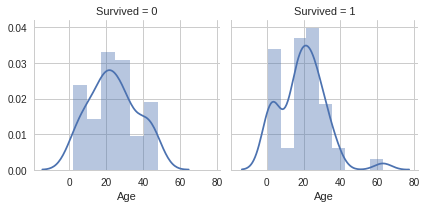

In [57]:
g = sns.FacetGrid(data=df_F_cl3,col='Survived')
g.map(sns.distplot,'Age')

In [28]:
Difference(df_F_cl3[df_F_cl3['Age']<14])

Nsurv=12+-3.4641016151377544, Ndied=12+-3.4641016151377544
Nsurv-Ndied=0+-4.898979485566356, survRate=0.5+-0.1613743060919757


In [29]:
Difference(df_F_cl3[df_F_cl3['Age']<6])

Nsurv=11+-3.3166247903554, Ndied=4+-2.0
Nsurv-Ndied=7+-3.872983346207417, survRate=0.7333333333333333+-0.24176307144816261


In [30]:
Difference(df_F_cl3[df_F_cl3['Age']<40])

Nsurv=46+-6.782329983125268, Ndied=46+-6.782329983125268
Nsurv-Ndied=0+-9.591663046625438, survRate=0.5+-0.08242255917447337


### 4.2. Explore Parch and SibSp

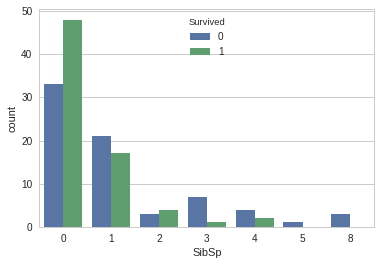

In [31]:
sns.countplot(x='SibSp',hue='Survived',data=df_F_cl3)

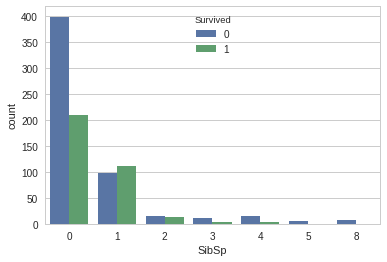

In [32]:
sns.countplot(x='SibSp',hue='Survived',data=df)

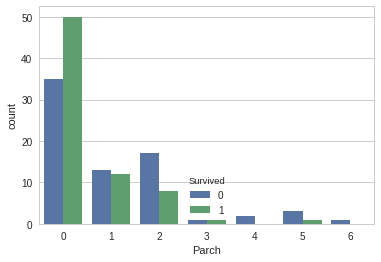

In [33]:
sns.countplot(x='Parch',hue='Survived',data=df_F_cl3)

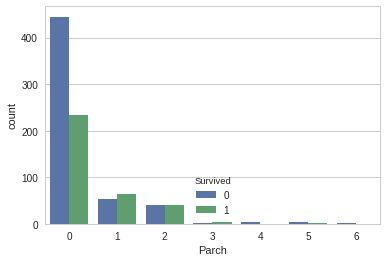

In [34]:
sns.countplot(x='Parch',hue='Survived',data=df)

In [35]:
Difference(df_F_cl3[df_F_cl3['SibSp']==0])

Nsurv=48+-6.928203230275509, Ndied=33+-5.744562646538029
Nsurv-Ndied=15+-9.0, survRate=0.5925925925925926+-0.0953007076002782


In [36]:
Difference(df_F_cl3[df_F_cl3['Parch']==0])

Nsurv=50+-7.0710678118654755, Ndied=35+-5.916079783099616
Nsurv-Ndied=15+-9.219544457292887, survRate=0.5882352941176471+-0.09271806925241705


In [37]:
cond1=(df_F_cl3['SibSp']==0)
cond2=(df_F_cl3['Parch']==0)
Difference(df_F_cl3[cond1 & cond2])

Nsurv=37+-6.082762530298219, Ndied=23+-4.795831523312719
Nsurv-Ndied=14+-7.745966692414834, survRate=0.6166666666666667+-0.11272679471586859


### 4.3. Explore embarkation port

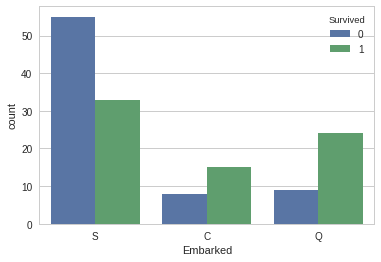

In [38]:
sns.countplot(x='Embarked',hue='Survived',data=df_F_cl3)

In [39]:
Difference(df_F_cl3[df_F_cl3['Embarked']=='Q'])

Nsurv=24+-4.898979485566356, Ndied=9+-3.0
Nsurv-Ndied=15+-5.744562646538029, survRate=0.7272727272727273+-0.16251108764465705


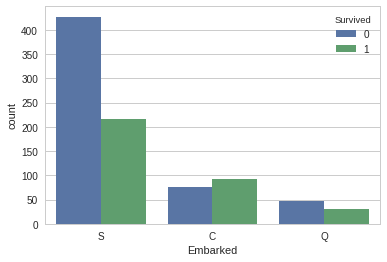

In [40]:
sns.countplot(x='Embarked',hue='Survived',data=df)

In [44]:
df_F_cl3_notQ = df_F_cl3[(df_F_cl3['Embarked']=='S') | (df_F_cl3['Embarked']=='C')]

### 4.4. Explore CabType

In [45]:
#sns.countplot(x='CabType',hue='Survived',data=df_F_cl3_notQ)
df_F_cl3_notQ.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S


In [103]:
Difference(df_F_cl3_notQ[(df_F_cl3_notQ['CabType']=='F')|(df_F_cl3_notQ['CabType']=='E')])

Nsurv=2+-1.4142135623730951, Ndied=0+-0.0
Nsurv-Ndied=2+-1.4142135623730951, survRate=1.0+-0.7071067811865476


### 4.5. Explore Fare

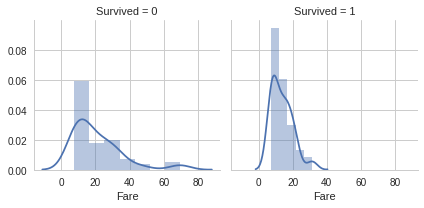

In [104]:
g = sns.FacetGrid(data=df_F_cl3_notQ,col='Survived')
g.map(sns.distplot,'Fare')

(5, 20)

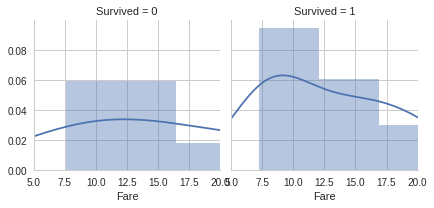

In [105]:
g = sns.FacetGrid(data=df_F_cl3_notQ,col='Survived')
g.map(sns.distplot,'Fare')
plt.xlim(5,20)

In [106]:
Difference(df_F_cl3_notQ[df_F_cl3_notQ['Fare']<10])

Nsurv=19+-4.358898943540674, Ndied=19+-4.358898943540674
Nsurv-Ndied=0+-6.164414002968976, survRate=0.5+-0.12824729401064427


### 4.6. Explore Title

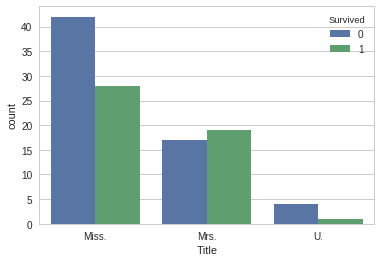

In [107]:
sns.countplot(x='Title',hue='Survived',data=df_F_cl3_notQ)

In [108]:
Difference(df_F_cl3_notQ[df_F_cl3_notQ['Title']=='Mrs.'])

Nsurv=19+-4.358898943540674, Ndied=17+-4.123105625617661
Nsurv-Ndied=2+-6.0, survRate=0.5277777777777778+-0.13533035570231863


## 5. Searching for survivors among Males

### 5.1. Explore Age

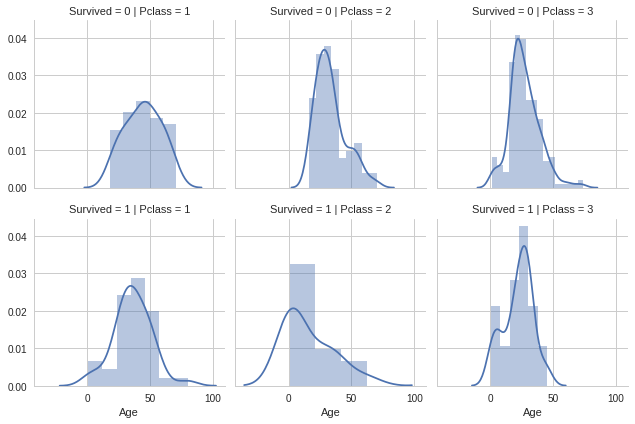

In [33]:
g = sns.FacetGrid(data=df_M,col='Pclass',row='Survived')
g.map(sns.distplot,'Age')

In [59]:
df_M_cl12 = df_M[(df_M['Pclass']==1)|(df_M['Pclass']==2)]

In [35]:
Difference(df_M_cl12[df_M_cl12['Age']<14])

Nsurv=12+-3.4641016151377544, Ndied=0+-0.0
Nsurv-Ndied=12+-3.4641016151377544, survRate=1.0+-0.28867513459481287


In [36]:
Difference(df_M_cl12[df_M_cl12['Age']<16])

Nsurv=12+-3.4641016151377544, Ndied=0+-0.0
Nsurv-Ndied=12+-3.4641016151377544, survRate=1.0+-0.28867513459481287


In [37]:
Difference(df_M_cl12[df_M_cl12['Age']<18])

Nsurv=13+-3.605551275463989, Ndied=2+-1.4142135623730951
Nsurv-Ndied=11+-3.872983346207417, survRate=0.8666666666666667+-0.25387855558840394


#### Now, when we know that all males in the 1st and 2nd class under 14 years old survived, we will search for survivors among males older than that

In [60]:
df_M_cl12_Adult = df_M_cl12[df_M_cl12['Age']>14]
df_M_cl1_Adult = df_M_cl1[df_M_cl1['Age']>14]
df_M_cl2_Adult = df_M_cl2[df_M_cl2['Age']>14]

df_M_Further = pd.concat([df_M_cl12_Adult, df_M_cl3])

### 5.2. Explore Parch and Sibsp

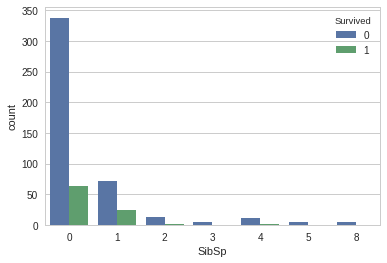

In [39]:
sns.countplot(x='SibSp',hue='Survived',data=df_M_Further)

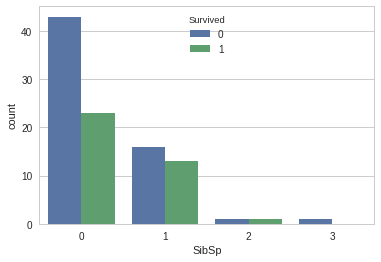

In [40]:
sns.countplot(x='SibSp',hue='Survived',data=df_M_cl1_Adult)

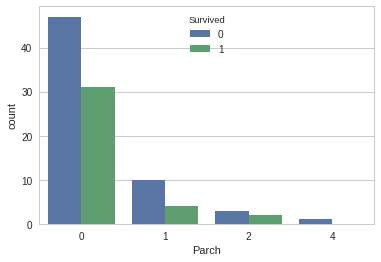

In [43]:
sns.countplot(x='Parch',hue='Survived',data=df_M_cl1_Adult)

### 5.3. Explore embarkation port

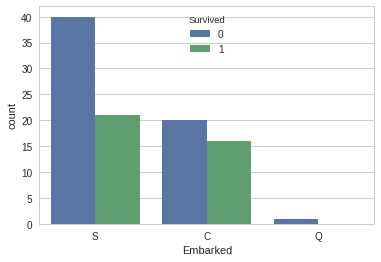

In [68]:
sns.countplot(x='Embarked',hue='Survived',data=df_M_cl1_Adult)

### 5.4. Explore CabType

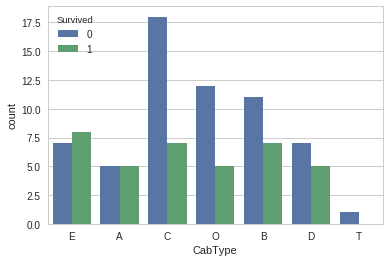

In [71]:
sns.countplot(x='CabType',hue='Survived',data=df_M_cl1_Adult)

In [75]:
Difference(df_M_cl1_Adult[(df_M_cl1_Adult['CabType']=='E')])

Nsurv=8+-2.8284271247461903, Ndied=7+-2.6457513110645907
Nsurv-Ndied=1+-3.872983346207417, survRate=0.5333333333333333+-0.21072479273119463


### 5.5. Explore Fare

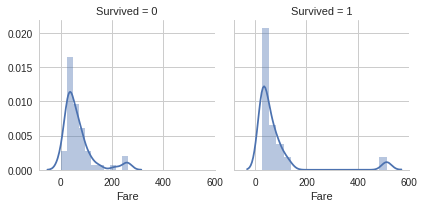

In [83]:
g = sns.FacetGrid(data=df_M_cl1_Adult,col='Survived')
g.map(sns.distplot,'Fare')

In [84]:
Difference(df_M_cl1_Adult[df_M_cl1_Adult['Fare']>400])

Nsurv=2+-1.4142135623730951, Ndied=0+-0.0
Nsurv-Ndied=2+-1.4142135623730951, survRate=1.0+-0.7071067811865476


### 5.6. Explore Title

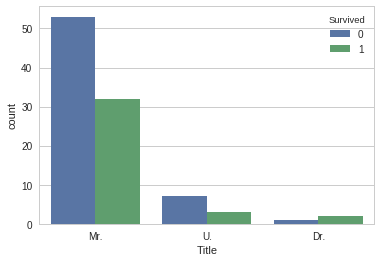

In [61]:
sns.countplot(x='Title',hue='Survived',data=df_M_cl1_Adult)

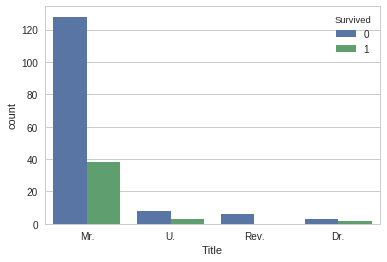

In [62]:
sns.countplot(x='Title',hue='Survived',data=df_M_cl12_Adult)

In [63]:
Difference(df_M_cl1_Adult[df_M_cl1_Adult['Title']=='Dr.'])

Nsurv=2+-1.4142135623730951, Ndied=1+-1.0
Nsurv-Ndied=1+-1.7320508075688772, survRate=0.6666666666666666+-0.5211573066470477


## 6. Prepare the submition file

In [48]:
dfNew=pd.DataFrame(columns=('PassengerId', 'Survived'))

for i in range(418):
    surv=0       
    PassId=dfTest.loc[i]['PassengerId']
    if (dfTest.loc[i]['Sex']=='female'): 
        if (dfTest.loc[i]['Pclass']==1): surv=1
        if (dfTest.loc[i]['Pclass']==2): surv=1
        if (dfTest.loc[i]['Pclass']==3): 
            if (dfTest.loc[i]['Embarked']=='Q'): surv=1
                
    if (dfTest.loc[i]['Sex']=='male'):
        if (dfTest.loc[i]['Pclass']==1): 
            if (dfTest.loc[i]['Age']<14): surv=1
        if (dfTest.loc[i]['Pclass']==2):
            if (dfTest.loc[i]['Age']<14): surv=1
            
    dfNew.loc[i] = pd.Series({'PassengerId':PassId,'Survived':surv})

dfNew.to_csv('submit1.csv',index=False)
# 0.77033

In [47]:
dfNew=pd.DataFrame(columns=('PassengerId', 'Survived'))

for i in range(418):
    surv=0       
    PassId=dfTest.loc[i]['PassengerId']
    if (dfTest.loc[i]['Sex']=='female'): 
        if (dfTest.loc[i]['Pclass']==1): surv=1
        if (dfTest.loc[i]['Pclass']==2): surv=1
        if (dfTest.loc[i]['Pclass']==3): 
            if (dfTest.loc[i]['Embarked']=='S'): pass
            elif (dfTest.loc[i]['Parch']>1): pass
            elif (dfTest.loc[i]['SibSp']>1): pass
            elif (dfTest.loc[i]['Age']>40): pass
            else: surv=0
            
                
    if (dfTest.loc[i]['Sex']=='male'):
        if (dfTest.loc[i]['Pclass']==1): 
            if (dfTest.loc[i]['Age']<14): surv=1
        if (dfTest.loc[i]['Pclass']==2):
            if (dfTest.loc[i]['Age']<14): surv=1
            
    dfNew.loc[i] = pd.Series({'PassengerId':PassId,'Survived':surv})

dfNew.to_csv('submit2.csv',index=False)
# 0.76555